In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg

import os
import pathlib
import random

In [2]:
# getting the classnames
data_dir = pathlib.Path('./seg_train/seg_train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class names form the subdirectories in the training folder
class_names

array(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
      dtype='<U9')

In [3]:
# finding out the number of images in each folder/class for training
num_building_images_train = len(os.listdir('./seg_train/seg_train/buildings'))
num_forest_images_train = len(os.listdir('./seg_train/seg_train/forest'))
num_glacier_images_train = len(os.listdir('./seg_train/seg_train/glacier'))
num_mountain_images_train = len(os.listdir('./seg_train/seg_train/mountain'))
num_sea_images_train = len(os.listdir('./seg_train/seg_train/sea'))
num_street_images_train = len(os.listdir('./seg_train/seg_train/street'))

print(f'Buildings in train: {num_building_images_train}')
print(f'Forest in train: {num_forest_images_train}')
print(f'Glacier in train: {num_glacier_images_train}')
print(f'Mountain in train: {num_mountain_images_train}')
print(f'Sea in train: {num_sea_images_train}')
print(f'Street in train: {num_street_images_train}')

Buildings in train: 2192
Forest in train: 2271
Glacier in train: 2404
Mountain in train: 2512
Sea in train: 2274
Street in train: 2382


In [4]:
# finding out the number of images in each folder/class for testing
num_building_images_test = len(os.listdir('./seg_test/seg_test/buildings'))
num_forest_images_test = len(os.listdir('./seg_test/seg_test/forest'))
num_glacier_images_test = len(os.listdir('./seg_test/seg_test/glacier'))
num_mountain_images_test = len(os.listdir('./seg_test/seg_test/mountain'))
num_sea_images_test = len(os.listdir('./seg_test/seg_test/sea'))
num_street_images_test = len(os.listdir('./seg_test/seg_test/street'))

print(f'Buildings in test: {num_building_images_test}')
print(f'Forest in test: {num_forest_images_test}')
print(f'Glacier in test: {num_glacier_images_test}')
print(f'Mountain in test: {num_mountain_images_test}')
print(f'Sea in test: {num_sea_images_test}')
print(f'Street in test: {num_street_images_test}')

Buildings in test: 437
Forest in test: 474
Glacier in test: 553
Mountain in test: 525
Sea in test: 510
Street in test: 501


In [5]:
# Number of images in pred
num_images_pred = len(os.listdir('./seg_pred/seg_pred'))
print(f'Images in pred : {num_images_pred}')

Images in pred : 7302


In [6]:
# visualize the images
def view_random_image(target_dir, target_class):
  # setup the target directory(we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}') # show shape of img

  return img

['2802.jpg']
Image shape: (150, 150, 3)


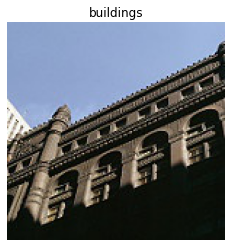

In [7]:
building = view_random_image(target_dir='./seg_train/seg_train/', target_class='buildings')

['13723.jpg']
Image shape: (150, 150, 3)


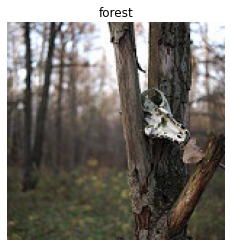

In [8]:
forest = view_random_image(target_dir='./seg_train/seg_train/', target_class='forest')

['1497.jpg']
Image shape: (150, 150, 3)


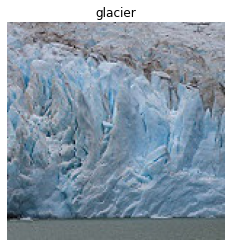

In [9]:
glacier = view_random_image(target_dir='./seg_train/seg_train/', target_class='glacier')

['15354.jpg']
Image shape: (150, 150, 3)


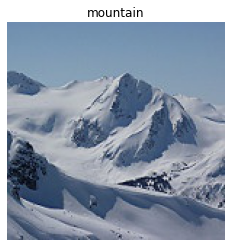

In [10]:
mountain = view_random_image(target_dir='./seg_train/seg_train/', target_class='mountain')

['15937.jpg']
Image shape: (150, 150, 3)


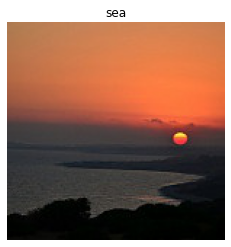

In [11]:
sea = view_random_image(target_dir='./seg_train/seg_train/', target_class='sea')

['8947.jpg']
Image shape: (150, 150, 3)


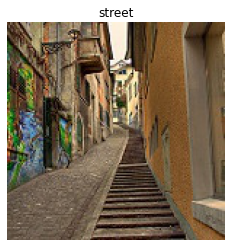

In [12]:
street = view_random_image(target_dir='./seg_train/seg_train/', target_class='street')

In [13]:
building

array([[[138, 161, 203],
        [139, 162, 204],
        [140, 163, 205],
        ...,
        [160, 186, 221],
        [159, 185, 220],
        [160, 184, 222]],

       [[137, 160, 202],
        [138, 161, 203],
        [139, 162, 204],
        ...,
        [160, 184, 220],
        [160, 184, 220],
        [160, 184, 222]],

       [[136, 159, 201],
        [137, 160, 202],
        [138, 161, 203],
        ...,
        [160, 182, 221],
        [160, 182, 221],
        [161, 183, 222]],

       ...,

       [[  9,  14,   8],
        [  9,  14,   8],
        [  9,  14,   8],
        ...,
        [  9,  14,   8],
        [  9,  14,   8],
        [ 10,  15,   9]],

       [[ 10,  15,   9],
        [  9,  14,   8],
        [  9,  14,   8],
        ...,
        [  8,  13,   7],
        [  9,  14,   8],
        [  9,  14,   8]],

       [[ 11,  16,  10],
        [ 10,  15,   9],
        [  9,  14,   8],
        ...,
        [  8,  13,   7],
        [  8,  13,   7],
        [  8,  13,   7]]

In [14]:
# finding the shapes for the images
building.shape, forest.shape, glacier.shape, mountain.shape, sea.shape, street.shape

((150, 150, 3),
 (150, 150, 3),
 (150, 150, 3),
 (150, 150, 3),
 (150, 150, 3),
 (150, 150, 3))

In [15]:
len(building)

150

In [16]:
# the 3rd value consists of rgb values which range form 0-255
# The tensor model takes in tensors with number between 0 and 1 so we will convert it
# there is an image data generator which can rescale the image for us

# preprocess data(get pixel values between 0 & 1) --> scaling/normalization
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
pred_datagen = ImageDataGenerator(rescale=1./255)

# setup path to data directory
train_dir = './seg_train/seg_train'
test_dir = './seg_test/seg_test'
pred_dir = './seg_pred/'

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, batch_size=32,
                                               target_size=(150, 150),
                                               class_mode='categorical',
                                               seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir, batch_size=32,
                                               target_size=(150, 150),
                                               class_mode='categorical',
                                               seed=42)

pred_data = pred_datagen.flow_from_directory(directory=pred_dir,
                                             batch_size=32,
                                               target_size=(150, 150),
                                               class_mode='categorical',
                                               seed=42)

Found 14038 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7304 images belonging to 1 classes.


In [17]:
# pred_data[0]

In [18]:
train_data, test_data, pred_data

(<keras.preprocessing.image.DirectoryIterator at 0x1587807c0>,
 <keras.preprocessing.image.DirectoryIterator at 0x158780df0>)

In [19]:
train_data[0][0].shape # the batch size is 32

(32, 150, 150, 3)

In [20]:
train_data[0][0][0] # numbers are from 0-1

array([[[0.6117647 , 0.7725491 , 0.8980393 ],
        [0.6117647 , 0.7725491 , 0.8980393 ],
        [0.6156863 , 0.77647066, 0.90196085],
        ...,
        [0.7372549 , 0.8117648 , 0.87843144],
        [0.7960785 , 0.8352942 , 0.8745099 ],
        [0.82745105, 0.83921576, 0.86666673]],

       [[0.60784316, 0.76470596, 0.90196085],
        [0.6117647 , 0.7686275 , 0.9058824 ],
        [0.6117647 , 0.7686275 , 0.9058824 ],
        ...,
        [0.72156864, 0.80392164, 0.87843144],
        [0.7803922 , 0.8352942 , 0.8862746 ],
        [0.8078432 , 0.8431373 , 0.87843144]],

       [[0.59607846, 0.76470596, 0.8980393 ],
        [0.60784316, 0.76470596, 0.90196085],
        [0.60784316, 0.76470596, 0.90196085],
        ...,
        [0.69411767, 0.79215693, 0.87843144],
        [0.74509805, 0.8117648 , 0.8745099 ],
        [0.76470596, 0.8196079 , 0.86274517]],

       ...,

       [[0.41960788, 0.5176471 , 0.59607846],
        [0.4156863 , 0.5137255 , 0.5921569 ],
        [0.40784317, 0

# Model 1

In [21]:
# basic model no cnn
model_1 = Sequential()

# In order to "align" our neurons in a vertical array, we
# add a "Flatten" layer. This will be required before adding
# subsequent Dense layers. We need to specify the input shape.
model_1.add(Flatten(input_shape=(150, 150, 3)))

# add layers
model_1.add(Dense(10, activation='relu'))

model_1.add(Dense(6, activation='softmax'))

# compile the model
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
history_1 = model_1.fit(train_data, 
                       epochs=5,
                       validation_data=test_data)


Metal device set to: Apple M1
Epoch 1/5


2022-04-12 09:45:09.015990: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-12 09:45:09.016071: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-04-12 09:45:09.097161: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  4/439 [..............................] - ETA: 7s - loss: 8.7964 - accuracy: 0.1172  

2022-04-12 09:45:09.243798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


439/439 [==============================] - ETA: 0s - loss: 1.8552 - accuracy: 0.1781

2022-04-12 09:45:17.895038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


439/439 [==============================] - 11s 24ms/step - loss: 1.8552 - accuracy: 0.1781 - val_loss: 1.7907 - val_accuracy: 0.1750
Epoch 2/5
439/439 [==============================] - 8s 17ms/step - loss: 1.7910 - accuracy: 0.1789 - val_loss: 1.7903 - val_accuracy: 0.1750
Epoch 3/5
439/439 [==============================] - 8s 17ms/step - loss: 1.7909 - accuracy: 0.1789 - val_loss: 1.7903 - val_accuracy: 0.1750
Epoch 4/5
439/439 [==============================] - 8s 17ms/step - loss: 1.7909 - accuracy: 0.1789 - val_loss: 1.7902 - val_accuracy: 0.1750
Epoch 5/5
439/439 [==============================] - 8s 17ms/step - loss: 1.7909 - accuracy: 0.1789 - val_loss: 1.7901 - val_accuracy: 0.1750


In [22]:
def plot_graph(history):
  # Check out our train loss and test loss over epochs.
  train_loss = history.history['loss']
  test_loss = history.history['val_loss']

  # Set figure size.
  plt.figure(figsize=(12, 8))

  # Generate line plot of training, testing loss over epochs.
  plt.plot(train_loss, label='Training Loss', color='#185fad')
  plt.plot(test_loss, label='Testing Loss', color='orange')

  # Set title
  plt.title('Training and Testing Loss by Epoch', fontsize = 25)
  plt.xlabel('Epoch', fontsize = 18)
  plt.ylabel('Categorical Crossentropy', fontsize = 18)
  plt.xticks(np.arange(10), np.arange(10))

  plt.legend(fontsize = 18);

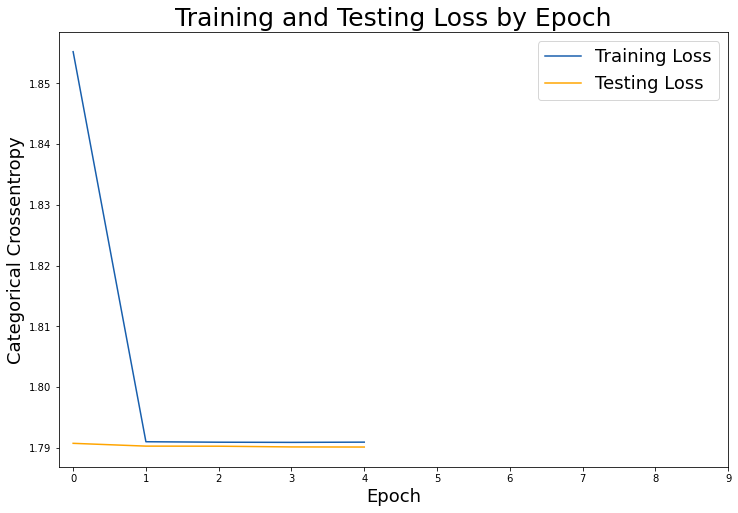

In [23]:
plot_graph(history_1)

In [24]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 10)                675010    
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
Total params: 675,076
Trainable params: 675,076
Non-trainable params: 0
_________________________________________________________________


In [25]:
train_loss, train_acc = model_1.evaluate(train_data)
print(f'Train loss: {train_loss}, train_acc: {train_acc}')

439/439 [==============================] - 6s 14ms/step - loss: 1.7908 - accuracy: 0.1789
Train loss: 1.7907756567001343, train_acc: 0.17894287407398224


* The accuracy is really low

In [26]:
pred_data[0][0][0].shape

(150, 150, 3)

# Using CNN

1 conv2d and 1 maxpool layer

In [27]:
# 
model_2 = Sequential()

model_2.add(Conv2D(filters=10,
                   kernel_size=3,
                   activation='relu',
                   input_shape=(150, 150, 3)))


model_2.add(MaxPooling2D(pool_size=2))

model_2.add(Flatten())

model_2.add(Dense(6, activation='softmax'))

# compile the model
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# fit the model
history_2 = model_2.fit(train_data, epochs=5,
                        validation_data=test_data)

Epoch 1/5
  3/439 [..............................] - ETA: 14s - loss: 4.4226 - acc: 0.2188 

2022-04-12 09:45:56.553143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


439/439 [==============================] - ETA: 0s - loss: 1.1174 - acc: 0.6118

2022-04-12 09:46:09.729631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


439/439 [==============================] - 15s 33ms/step - loss: 1.1174 - acc: 0.6118 - val_loss: 0.8564 - val_acc: 0.6990
Epoch 2/5
439/439 [==============================] - 14s 33ms/step - loss: 0.6430 - acc: 0.7764 - val_loss: 0.8343 - val_acc: 0.6967
Epoch 3/5
439/439 [==============================] - 14s 33ms/step - loss: 0.4272 - acc: 0.8580 - val_loss: 0.8472 - val_acc: 0.7070
Epoch 4/5
439/439 [==============================] - 14s 32ms/step - loss: 0.2785 - acc: 0.9152 - val_loss: 0.9149 - val_acc: 0.7067
Epoch 5/5
439/439 [==============================] - 15s 35ms/step - loss: 0.1928 - acc: 0.9479 - val_loss: 0.9718 - val_acc: 0.7037


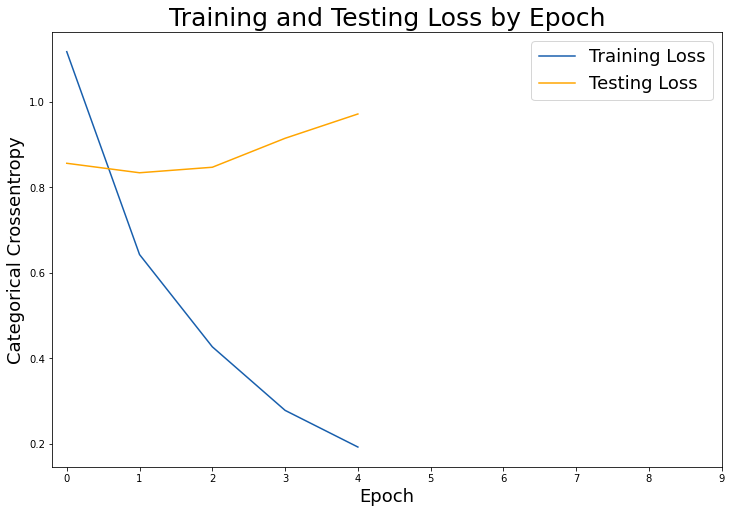

In [28]:
plot_graph(history_2)

In [29]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 10)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 54760)             0         
                                                                 
 dense_2 (Dense)             (None, 6)                 328566    
                                                                 
Total params: 328,846
Trainable params: 328,846
Non-trainable params: 0
_________________________________________________________________


In [30]:
train_loss, train_acc = model_2.evaluate(train_data)
print(f'Train loss: {train_loss}, train_acc: {train_acc}')

439/439 [==============================] - 7s 15ms/step - loss: 0.1166 - acc: 0.9816
Train loss: 0.11660263687372208, train_acc: 0.9816213250160217


In [31]:
cnn_score = model_2.evaluate(test_data,
                               verbose=1)

94/94 [==============================] - 1s 15ms/step - loss: 0.9718 - acc: 0.7037


# MODEL 3

2 maxpool and 2 conv2d layers

In [32]:

model_3 = Sequential()

model_3.add(Conv2D(filters=10,
                   kernel_size=3,
                   activation='relu',
                   input_shape=(150, 150, 3)))


model_3.add(MaxPooling2D(pool_size=2,padding='valid'))

model_3.add(Conv2D(10, 3, activation='relu'))


model_3.add(MaxPooling2D(2))

model_3.add(Flatten())

model_3.add(Dense(6, activation='softmax'))

# compile the model
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# fit the model
history_3 = model_3.fit(train_data, epochs=5,
                        validation_data=test_data)

Epoch 1/5
  3/439 [..............................] - ETA: 15s - loss: 1.8087 - acc: 0.2604 

2022-04-12 09:47:18.142457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


438/439 [============================>.] - ETA: 0s - loss: 0.9749 - acc: 0.6434

2022-04-12 09:47:36.308017: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


439/439 [==============================] - 20s 45ms/step - loss: 0.9746 - acc: 0.6435 - val_loss: 0.7935 - val_acc: 0.7277
Epoch 2/5
439/439 [==============================] - 23s 52ms/step - loss: 0.6716 - acc: 0.7693 - val_loss: 0.8300 - val_acc: 0.7120
Epoch 3/5
439/439 [==============================] - 25s 57ms/step - loss: 0.5542 - acc: 0.8084 - val_loss: 0.6992 - val_acc: 0.7420
Epoch 4/5
439/439 [==============================] - 27s 61ms/step - loss: 0.4626 - acc: 0.8455 - val_loss: 0.6341 - val_acc: 0.7773
Epoch 5/5
439/439 [==============================] - 28s 63ms/step - loss: 0.3899 - acc: 0.8700 - val_loss: 0.6768 - val_acc: 0.7630


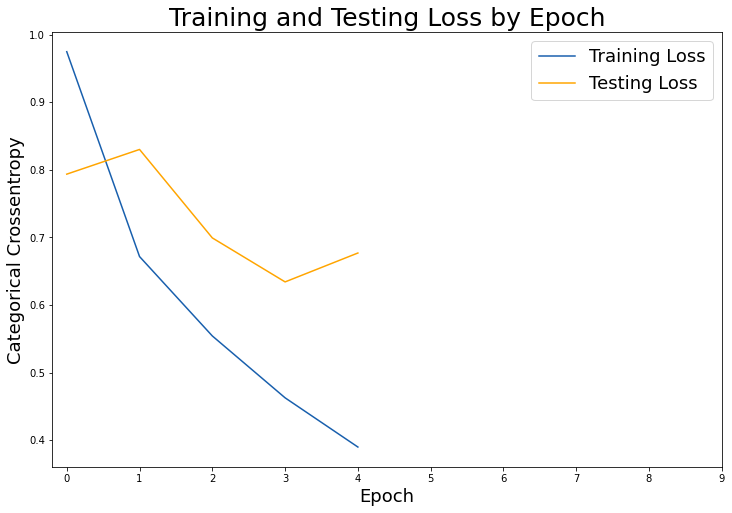

In [33]:
plot_graph(history_3)

In [34]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 10)      280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 36, 36, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 12960)             0         
                                                                 
 dense_3 (Dense)             (None, 6)                

In [35]:
train_loss, train_acc = model_3.evaluate(train_data)
print(f'Train loss: {train_loss}, train_acc: {train_acc}')

439/439 [==============================] - 10s 23ms/step - loss: 0.3080 - acc: 0.9169
Train loss: 0.3080195188522339, train_acc: 0.9168685078620911


In [36]:
model_3.evaluate(test_data)

94/94 [==============================] - 2s 25ms/step - loss: 0.6768 - acc: 0.7630


[0.6768306493759155, 0.7630000114440918]

# MODEL 4

More conv2d and maxpool2d layers

In [37]:
model_4 = Sequential()

model_4.add(Conv2D(filters=10,
                   kernel_size=3,
                   activation='relu',
                   input_shape=(150, 150, 3)))


model_4.add(Conv2D(10, 3, activation='relu'))

model_4.add(MaxPooling2D(pool_size=2,padding='valid'))

model_4.add(Conv2D(10, 3, activation='relu'))

model_4.add(Conv2D(10, 3, activation='relu'))

model_4.add(MaxPooling2D(2))


model_4.add(Flatten())

model_4.add(Dense(6, activation='softmax'))

# compile the model
model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# fit the model
history_4 = model_4.fit(train_data, epochs=5,
                        validation_data=test_data)

Epoch 1/5
  1/439 [..............................] - ETA: 2:42 - loss: 1.8049 - acc: 0.1250

2022-04-12 09:49:32.999802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


439/439 [==============================] - ETA: 0s - loss: 0.9866 - acc: 0.6268

2022-04-12 09:50:10.330255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


439/439 [==============================] - 40s 91ms/step - loss: 0.9866 - acc: 0.6268 - val_loss: 0.8178 - val_acc: 0.7197
Epoch 2/5
439/439 [==============================] - 39s 89ms/step - loss: 0.6792 - acc: 0.7583 - val_loss: 0.6487 - val_acc: 0.7803
Epoch 3/5
439/439 [==============================] - 39s 90ms/step - loss: 0.5598 - acc: 0.8057 - val_loss: 0.6737 - val_acc: 0.7660
Epoch 4/5
439/439 [==============================] - 40s 91ms/step - loss: 0.4723 - acc: 0.8369 - val_loss: 0.6907 - val_acc: 0.7500
Epoch 5/5
439/439 [==============================] - 41s 93ms/step - loss: 0.3862 - acc: 0.8657 - val_loss: 0.7344 - val_acc: 0.7620


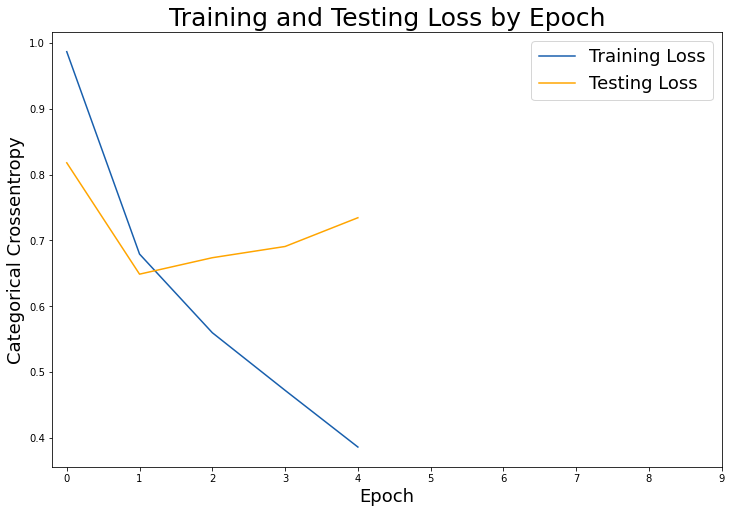

In [38]:
plot_graph(history_4)

In [39]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 10)      280       
                                                                 
 conv2d_4 (Conv2D)           (None, 146, 146, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 73, 73, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 71, 71, 10)        910       
                                                                 
 conv2d_6 (Conv2D)           (None, 69, 69, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 34, 34, 10)       0         
 2D)                                                  

In [40]:
train_loss, train_acc = model_4.evaluate(train_data)
print(f'Train loss: {train_loss}, train_acc: {train_acc}')

439/439 [==============================] - 15s 34ms/step - loss: 0.3166 - acc: 0.8892
Train loss: 0.3166326880455017, train_acc: 0.8891580104827881


In [41]:
model_4.evaluate(test_data)

94/94 [==============================] - 3s 35ms/step - loss: 0.7344 - acc: 0.7620


[0.7344004511833191, 0.7619999647140503]

In [42]:
pred_data[0][0][0].shape

(150, 150, 3)

In [43]:
preds_4 = model_4.predict(pred_data)

2022-04-12 09:53:11.198572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


# MODEL 5

adding padding

In [44]:
model_5 = Sequential()

model_5.add(Conv2D(filters=10,
                   kernel_size=2,
                   activation='relu',
                   input_shape=(150, 150, 3),
                  padding='valid'))

model_5.add(MaxPooling2D(pool_size=2))

model_5.add(Conv2D(10, 2, activation='relu', padding='valid'))
model_5.add(MaxPooling2D(pool_size=2))

model_5.add(Conv2D(10, 2, activation='relu', padding='valid'))
model_5.add(MaxPooling2D(pool_size=2))


model_5.add(Flatten())

model_5.add(Dense(6, activation='softmax'))

# compile the model
model_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# fit the model
history_5 = model_5.fit(train_data, epochs=5,
                        validation_data=test_data)

Epoch 1/5


2022-04-12 09:53:17.793567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


439/439 [==============================] - ETA: 0s - loss: 1.0759 - acc: 0.5699

2022-04-12 09:53:47.182333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


439/439 [==============================] - 32s 73ms/step - loss: 1.0759 - acc: 0.5699 - val_loss: 0.9430 - val_acc: 0.6400
Epoch 2/5
439/439 [==============================] - 32s 72ms/step - loss: 0.8075 - acc: 0.7000 - val_loss: 0.7796 - val_acc: 0.7147
Epoch 3/5
439/439 [==============================] - 33s 75ms/step - loss: 0.6953 - acc: 0.7456 - val_loss: 0.7186 - val_acc: 0.7440
Epoch 4/5
439/439 [==============================] - 33s 75ms/step - loss: 0.6396 - acc: 0.7720 - val_loss: 0.6898 - val_acc: 0.7567
Epoch 5/5
439/439 [==============================] - 34s 78ms/step - loss: 0.5993 - acc: 0.7840 - val_loss: 0.6648 - val_acc: 0.7557


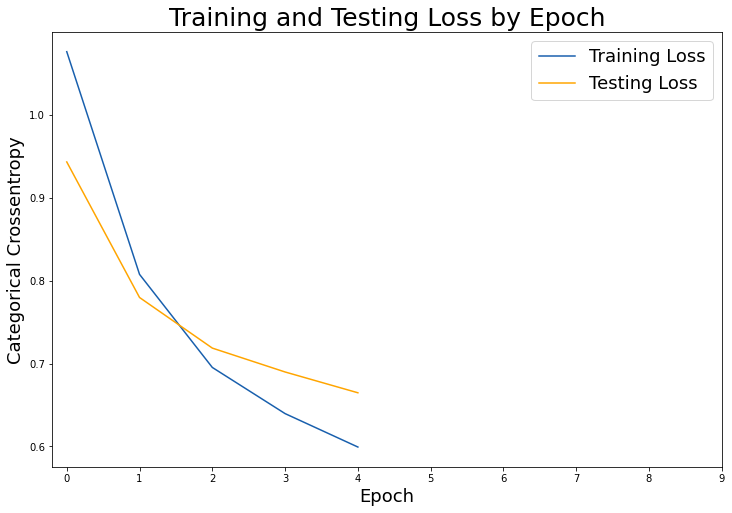

In [45]:
plot_graph(history_5)

In [46]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 149, 149, 10)      130       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 10)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 73, 73, 10)        410       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 35, 35, 10)        410       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 10)      

In [47]:
train_loss, train_acc = model_5.evaluate(train_data)
print(f'Train loss: {train_loss}, train_acc: {train_acc}')

439/439 [==============================] - 13s 30ms/step - loss: 0.5420 - acc: 0.8085
Train loss: 0.5419926643371582, train_acc: 0.808519721031189


In [48]:
model_5.evaluate(test_data)

94/94 [==============================] - 3s 29ms/step - loss: 0.6648 - acc: 0.7557


[0.6647548079490662, 0.7556666731834412]

### changing padding value to same

In [49]:
model_5 = Sequential()

model_5.add(Conv2D(filters=10,
                   kernel_size=2,
                   activation='relu',
                   input_shape=(150, 150, 3),
                  padding='same'))

model_5.add(MaxPooling2D(pool_size=2))

model_5.add(Conv2D(10, 2, activation='relu', padding='same'))
model_5.add(MaxPooling2D(pool_size=2))

model_5.add(Conv2D(10, 2, activation='relu', padding='same'))
model_5.add(MaxPooling2D(pool_size=2))


model_5.add(Flatten())

model_5.add(Dense(6, activation='softmax'))

# compile the model
model_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# fit the model
history_5 = model_5.fit(train_data, epochs=5,
                        validation_data=test_data)

Epoch 1/5


2022-04-12 09:56:18.405005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


439/439 [==============================] - ETA: 0s - loss: 1.0504 - acc: 0.5888

2022-04-12 09:56:50.590731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


439/439 [==============================] - 36s 80ms/step - loss: 1.0504 - acc: 0.5888 - val_loss: 0.9235 - val_acc: 0.6430
Epoch 2/5
439/439 [==============================] - 34s 76ms/step - loss: 0.7850 - acc: 0.7089 - val_loss: 0.7306 - val_acc: 0.7207
Epoch 3/5
439/439 [==============================] - 34s 77ms/step - loss: 0.6750 - acc: 0.7527 - val_loss: 0.7054 - val_acc: 0.7507
Epoch 4/5
439/439 [==============================] - 34s 78ms/step - loss: 0.6099 - acc: 0.7817 - val_loss: 0.7136 - val_acc: 0.7503
Epoch 5/5
439/439 [==============================] - 36s 81ms/step - loss: 0.5660 - acc: 0.7987 - val_loss: 0.6608 - val_acc: 0.7670


In [50]:
train_loss, train_acc = model_5.evaluate(train_data)
print(f'Train loss: {train_loss}, train_acc: {train_acc}')

439/439 [==============================] - 14s 31ms/step - loss: 0.5337 - acc: 0.8143
Train loss: 0.5337340235710144, train_acc: 0.8142898082733154


In [51]:
model_5.evaluate(test_data)

94/94 [==============================] - 3s 31ms/step - loss: 0.6608 - acc: 0.7670


[0.6607754826545715, 0.7670000195503235]

### adding two more layers

In [52]:
model_5 = Sequential()

model_5.add(Conv2D(filters=10,
                   kernel_size=2,
                   activation='relu',
                   input_shape=(150, 150, 3),
                  padding='same'))

model_5.add(MaxPooling2D(pool_size=2))

model_5.add(Conv2D(10, 2, activation='relu', padding='same'))
model_5.add(MaxPooling2D(pool_size=2))

model_5.add(Conv2D(10, 2, activation='relu', padding='same'))
model_5.add(MaxPooling2D(pool_size=2))

model_5.add(Conv2D(10, 2, activation='relu', padding='same'))
model_5.add(MaxPooling2D(pool_size=2))


model_5.add(Flatten())

model_5.add(Dense(6, activation='softmax'))

# compile the model
model_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# fit the model
history_5 = model_5.fit(train_data, epochs=5,
                        validation_data=test_data)

Epoch 1/5


2022-04-12 09:59:28.388920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


439/439 [==============================] - ETA: 0s - loss: 1.0994 - acc: 0.5637

2022-04-12 10:00:01.417639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


439/439 [==============================] - 37s 83ms/step - loss: 1.0994 - acc: 0.5637 - val_loss: 0.8837 - val_acc: 0.6807
Epoch 2/5
439/439 [==============================] - 36s 82ms/step - loss: 0.8251 - acc: 0.6948 - val_loss: 0.7622 - val_acc: 0.7203
Epoch 3/5
439/439 [==============================] - 37s 83ms/step - loss: 0.7244 - acc: 0.7342 - val_loss: 0.7422 - val_acc: 0.7120
Epoch 4/5
439/439 [==============================] - 37s 84ms/step - loss: 0.6673 - acc: 0.7577 - val_loss: 0.6698 - val_acc: 0.7560
Epoch 5/5
439/439 [==============================] - 36s 83ms/step - loss: 0.6345 - acc: 0.7704 - val_loss: 0.6834 - val_acc: 0.7520


In [53]:
train_loss, train_acc = model_5.evaluate(train_data)
print(f'Train loss: {train_loss}, train_acc: {train_acc}')

439/439 [==============================] - 13s 29ms/step - loss: 0.6307 - acc: 0.7719
Train loss: 0.6307191848754883, train_acc: 0.7719048261642456


In [54]:
model_5.evaluate(test_data)

94/94 [==============================] - 3s 28ms/step - loss: 0.6834 - acc: 0.7520


[0.6833746433258057, 0.7519999742507935]

# Model 6

changing number of filters & kernel size

In [68]:
model_6 = Sequential()

# Adding layers
model_6.add(Conv2D(filters=128,
                   kernel_size=3,
                   activation='relu',
                   input_shape=(150, 150, 3),
                  padding='same'))

model_6.add(MaxPooling2D(pool_size=2))

model_6.add(Conv2D(64, 3, activation='relu', padding='same'))
model_6.add(MaxPooling2D(pool_size=2))

model_6.add(Conv2D(32, 3, activation='relu', padding='same'))
model_6.add(MaxPooling2D(pool_size=2))


model_6.add(Flatten())

model_6.add(Dense(128,activation='relu'))

model_6.add(Dense(6, activation='softmax'))

# compile the model
model_6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# fit the model
history_6 = model_6.fit(train_data, epochs=5,
                        validation_data=test_data)

Epoch 1/5


2022-04-12 10:36:47.246290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


439/439 [==============================] - ETA: 0s - loss: 0.9374 - acc: 0.6340

2022-04-12 10:39:06.615280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


439/439 [==============================] - 150s 341ms/step - loss: 0.9374 - acc: 0.6340 - val_loss: 0.6958 - val_acc: 0.7393
Epoch 2/5
439/439 [==============================] - 163s 372ms/step - loss: 0.6115 - acc: 0.7780 - val_loss: 0.6022 - val_acc: 0.7887
Epoch 3/5
439/439 [==============================] - 161s 366ms/step - loss: 0.4542 - acc: 0.8340 - val_loss: 0.5813 - val_acc: 0.7963
Epoch 4/5
439/439 [==============================] - 165s 376ms/step - loss: 0.3272 - acc: 0.8820 - val_loss: 0.6630 - val_acc: 0.7807
Epoch 5/5
439/439 [==============================] - 180s 411ms/step - loss: 0.2205 - acc: 0.9237 - val_loss: 0.6451 - val_acc: 0.8053


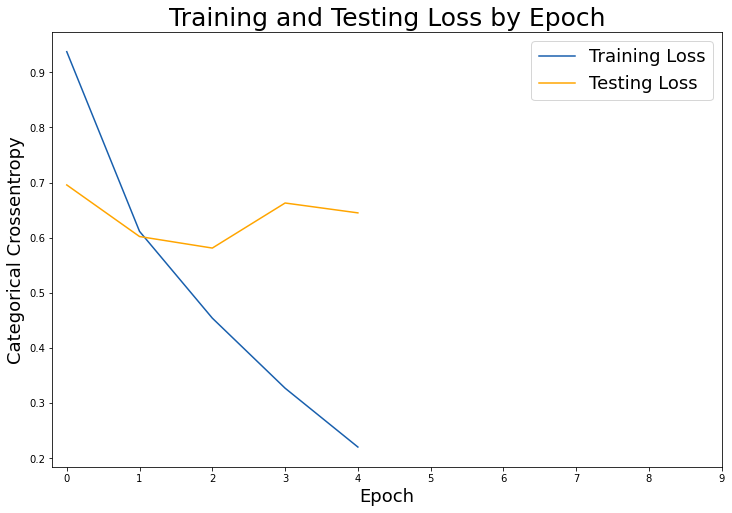

In [69]:
plot_graph(history_6)

In [70]:
train_loss, train_acc = model_6.evaluate(train_data)
print(f'Train loss: {train_loss}, train_acc: {train_acc}')

439/439 [==============================] - 62s 141ms/step - loss: 0.1413 - acc: 0.9629
Train loss: 0.141250342130661, train_acc: 0.9628864526748657


In [71]:
model_6.evaluate(test_data)

94/94 [==============================] - 13s 142ms/step - loss: 0.6451 - acc: 0.8053


[0.6450974345207214, 0.8053333163261414]